This is an ANN model test using the road, bus and rail data produced in test1

In [1]:
import pandas as pd

df_roaddataOiDj = pd.read_csv('Complete_Stage1_Road.csv')
#df_busdataOiDj = pd.read_csv('busdata_OiDj.csv')
#df_roaddataOiDj = pd.read_csv('roaddata_OiDj.csv')

print(df_roaddataOiDj.columns.tolist())

['Unnamed: 0', 'idx', 'Ck1Road', 'Ck1Bus', 'Ck1Rail', 'Ck2Road', 'Ck2Bus', 'Ck2Rail', 'CkDiffRoad', 'CkDiffBus', 'CkDiffRail', 'Lk1Road', 'Lk1Bus', 'Lk1Rail', 'Lk2Road', 'Lk2Bus', 'Lk2Rail', 'deltaLkRoad', 'deltaLkBus', 'deltaLkRail', 'scenarioLinkDepthRoad', 'scenarioLinkDepthBus', 'scenarioLinkDepthRail', 'scenarioLinkKMRoad', 'scenarioLinkKMBus', 'scenarioLinkKMRail', 'scenarioLinkSavedSecsRoad', 'scenarioLinkSavedSecsBus', 'scenarioLinkSavedSecsRail', 'LBarRoad', 'LBarBus', 'LBarRail', 'nMinusRoad', 'nMinusBus', 'nMinusRail', 'SavedSecsRoad', 'savedSecsBus', 'savedSecsRail', 'net_mode', 'net_i', 'net_j', 'net_secs', 'Oi_road_x', 'Oi_bus_x', 'Oi_rail_x', 'Oi_net_i', 'Dj_road_x', 'Dj_bus_x', 'Dj_rail_x', 'Dj_net_i', 'Oi_road_y', 'Oi_bus_y', 'Oi_rail_y', 'Oi_net_j', 'Dj_road_y', 'Dj_bus_y', 'Dj_rail_y', 'Dj_net_j', 'areakey_neti', 'zonei_neti', 'lat_neti', 'lon_neti', 'osgb36_east_neti', 'osgb36_north_neti', 'area_neti', 'areakey_netj', 'zonei_netj', 'lat_netj', 'lon_netj', 'osgb36_ea

inputs shape= (600000, 6)
float64
targets shape= (600000, 1)
float64


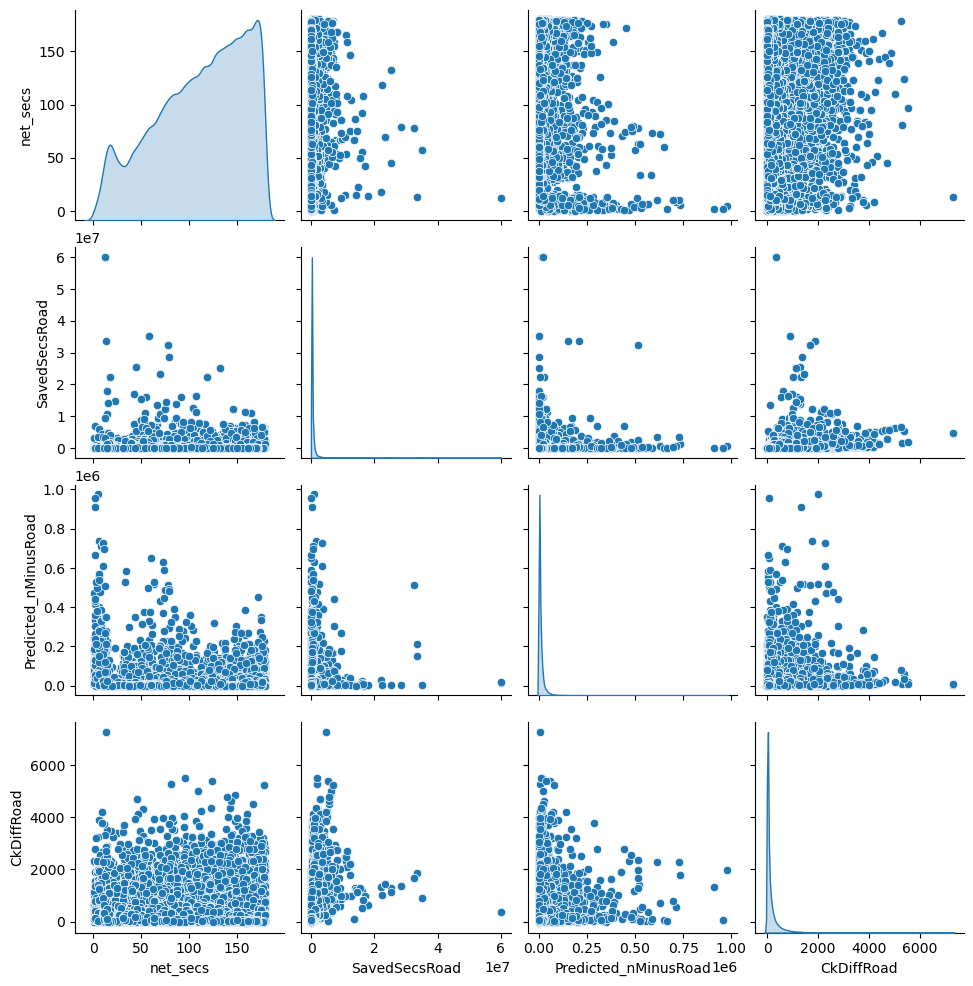

In [4]:
#DATA LOAD CELL - and make up the inputs and targets
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#inputs = df_roaddataOiDj[["net_i", "net_j"]].to_numpy(dtype="float")
inputs = df_roaddataOiDj[["net_secs", "SavedSecsRoad", "Predicted_nMinusRoad",'Oi_net_i', 'Dj_net_j','neti_Oi_netj_Dj']].to_numpy(dtype="float")
targets = df_roaddataOiDj["CkDiffRoad"].to_numpy(dtype="float").reshape( (-1,1) )

#normalise
iscaler = StandardScaler()
iscaler.fit(inputs)
tscaler = StandardScaler()
tscaler.fit(targets)
inputs = iscaler.transform(inputs)
targets = tscaler.transform(targets)

np.savetxt('ann_inputs.csv',inputs,delimiter=',',fmt='%g')
np.savetxt('ann_targets.csv',targets,delimiter=',',fmt='%g')

print('inputs shape=',inputs.shape)
print(inputs.dtype)
print('targets shape=',targets.shape)
print(targets.dtype)

#more exotic stuff
#df_roaddataOiDj.describe().transpose()
#sns.pairplot(df_roaddataOiDj[['net_i', 'net_j', 'CkDiffRail']], diag_kind='kde')
sns.pairplot(df_roaddataOiDj[['net_secs', 'SavedSecsRoad', 'Predicted_nMinusRoad', 'CkDiffRoad']], diag_kind='kde')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              7168      
                                                                 
 dense_7 (Dense)             (None, 32)                32800     
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dense_9 (Dense)             (None, 32)                288       
                                                                 
 dense_10 (Dense)            (None, 256)               8448      
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 49,225
Trainable params: 49,225
Non-trai

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R-Squared =  -0.00043309194140839224


<function matplotlib.pyplot.show(close=None, block=None)>

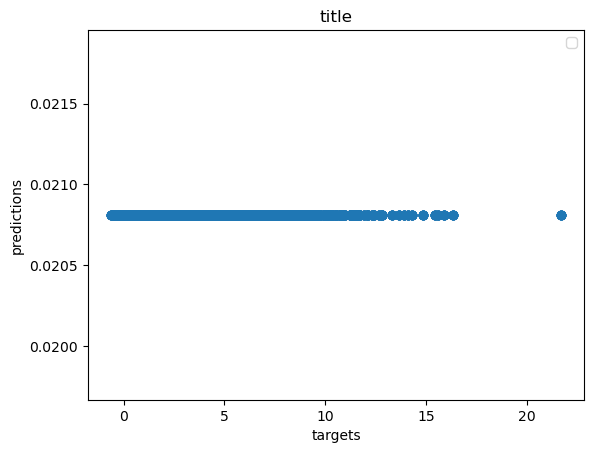

In [5]:
#MODEL CELL - run it here using inputs and targets from previous cell
#https://www.tensorflow.org/tutorials/keras/regression
import os

os.environ["KERAS_BACKEND"] = "tensorflow" #NOTE: you can use JAX as a backend too

import keras
from keras import layers

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score

#model = keras.Sequential()
#model.add(keras.layers.Input(shape=(2,)))
#model.add(keras.layers.Dense(10))
#model.add(keras.layers.Dense(1,activation='linear'))

#model = keras.Sequential([
#    keras.Input(shape=(None, None, 3)),
#    keras.layers.Conv2D(filters=32, kernel_size=3),
#])

model = keras.Sequential(
     [
         keras.layers.Input(shape=(6,)),
         #keras.layers.Normalization(axis=None),
         keras.layers.Dense(units=1024, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=8, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         ###
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=256, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=1, activation='linear')
     ]
)

model.summary()

my_loss = keras.losses.MeanSquaredError()
my_metric = keras.metrics.MeanSquaredError()

model.compile(
    #loss=keras.losses.MeanSquaredError,
    loss=my_loss,
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    #optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    #optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    #metrics=[
    #    keras.metrics.MeanSquaredError(name="MSE"),
    #],
    metrics = [ my_metric ]
)

batch_size = 8192
epochs = 100

callbacks = [
    #keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    #keras.callbacks.EarlyStopping(monitor="val_loss", patience=25),
]

model.fit(
    inputs,
    targets,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(inputs, targets, verbose=0)
print(score)

model.save("final_model.keras") #model = keras.saving.load_model("final_model.keras")

predictions = model.predict(inputs)
r2 = r2_score(y_true=targets, y_pred=predictions)
print("R-Squared = ",r2)
plt.scatter(targets,predictions)
plt.title("title")
plt.xlabel("targets")
plt.ylabel("predictions")
#plt.plot([np.min(targets),np.max(targets)],[np.min(targets),np.max(targets)],color='green')
plt.legend()
plt.show
